# Data Audit and Preparation

This notebook focuses on transforming synthetic raw data into a clean and structured format suitable for analysis and downstream machine learning tasks. This process includes data inspection, handling missing values, categorical normalization, removal of non-informative attributes, and basic distributional analysis.

A thorough understanding of the data is essential for selecting appropriate machine learning algorithms and designing an effective experimental protocol. This comprehension aids in identifying relevant features and informs preprocessing decisions, ultimately enhancing model robustness and accuracy.



## Dataset

The dataset used in this analysis is publicly available and is loaded directly from a GitHub repository. Initial inspection focuses on understanding the overall shape and basic characteristics of the data.

The dataset can be found here:

- [github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1](https://github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1)

You can access and read the data directly from this GitHub repository.

- [alien_pet_health.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv)

## Approach

**Dataset Loading and Initial Inspection**

The dataset is loaded into a pandas DataFrame and is inspected to understand its dimensionality and a sample of its records.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)



# Load the dataset from Github

# Github URL of the dataset
url = "https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)


# Display shape
print(f"Dataset shape: {df.shape}")
print(f"  Rows: {df.shape[0]}")
print(f"  Columns: {df.shape[1]}")
print()

# Display the first five rows
print("First 5 rows of the dataset:\n")
df.head()


Dataset shape: (5000, 14)
  Rows: 5000
  Columns: 14

First 5 rows of the dataset:



,record_id,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,ingest_marker,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,P22042111,52.6,97.0,3.6,-3.5,c2,2.0,0.0,1,Z-WHH,1.0,A,0.482088,34.742454
1,P21571318,41.8,105.0,3.4,10.5,c1,2.0,0.0,0,z-eat,1.0,A,NaN,NaN
2,P81737259,56.2,126.0,5.5,9.6,c2,5.0,0.0,0,Z-IPF,1.0,A,-0.747352,38.754061
3,P54935007,57.7,106.0,-4.1,-4.0,c1,4.0,0.0,1,Z-FKO,1.0,A,0.570478,40.465082
4,P63102956,34.5,73.0,2.3,0.3,c4,5.0,1.0,1,Z-SVY,1.0,A,-0.310844,NaN


**Missing Values**

The dataset is examined to identify and assess missing values in various attributes. Missing values
may be represented by symbols such as ‘?’, empty strings, or other placeholders. Missing tokens  (e.g., empty strings, n/a, ?) will be converted to NaN, and numeric-like columns will be coerced to numeric (errors→NaN).

Following this step, each attribute will be populated with either specific values or NaN.

**Methodology**

The dataset was inspected for both standard and non-standard missing value indicators. All identified placeholders were converted to NaN, and numeric-like columns were coerced to appropriate numeric types. The dataset was then re-examined to confirm that missing values were consistently
represented.

In [36]:
# Initial examination of the data

print("Initial Data Inspection")

# Check first few rows to visualize the data
print("\nFirst 10 rows of the dataset:")
display(df.head(10))

print("\nData Types and Non-Null Counts")

# Display data types and non-null counts
df.info() # Shows column names, non-null counts, and data types

print("\nChecking for Standard Missing Values")

# Count how many NaN/None values are in each column
missing_standard = df.isnull().sum() # Counts NaN values in each column
print("\nColumns with NaN values:")
print(missing_standard[missing_standard > 0]) # Only show columns with missing values (filter out zeros)


Initial Data Inspection

First 10 rows of the dataset:


,record_id,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,station_code,ingest_marker,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,P22042111,52.6,97.0,3.6,-3.5,c2,2.0,0.0,1,Z-WHH,1.0,A,0.482088,34.742454
1,P21571318,41.8,105.0,3.4,10.5,c1,2.0,0.0,0,z-eat,1.0,A,NaN,NaN
2,P81737259,56.2,126.0,5.5,9.6,c2,5.0,0.0,0,Z-IPF,1.0,A,-0.747352,38.754061
3,P54935007,57.7,106.0,-4.1,-4.0,c1,4.0,0.0,1,Z-FKO,1.0,A,0.570478,40.465082
4,P63102956,34.5,73.0,2.3,0.3,c4,5.0,1.0,1,Z-SVY,1.0,A,-0.310844,NaN
5,P64134852,39.7,69.0,-1.2,5.1,c4,2.0,1.0,0,Z-WAH,1.0,A,1.416906,20.280384
6,P74095503,51.2,94.0,-1.7,3.8,c2,3.0,1.0,1,Z-YDK,1.0,A,-1.347186,33.150564
7,P12582010,47.6,113.0,0.4,-4.4,c5,3.0,1.0,1,Z-SFR,1.0,A,-0.554478,NaN
8,P53695296,50.0,80.0,-2.6,NaN,c3,NaN,1.0,0,Z-DCX,1.0,A,-0.820194,31.848790
9,P23313347,43.3,71.0,0.4,-2.0,c4,3.0,1.0,0,Z-DJJ,1.0,A,0.280675,24.322605



Data Types and Non-Null Counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     4820 non-null   object 
 1   thermoreg_reading             4701 non-null   float64
 2   enzyme_activity_index         4743 non-null   float64
 3   dual_lobe_signal              4756 non-null   float64
 4   stress_variability            4709 non-null   float64
 5   habitat_zone                  4848 non-null   object 
 6   activity_score                4771 non-null   float64
 7   fasting_flag                  4764 non-null   float64
 8   health_outcome                5000 non-null   int64  
 9   station_code                  4852 non-null   object 
 10  ingest_marker                 4748 non-null   float64
 11  calibration_tag               4839 non-null   object 
 12  diagnostic_noise              

In [37]:
# Look for placeholder symbols

print("Checking for Placeholder Symbols")

placeholders = ["?", "NA", "N/A", "na", "n/a", "", " ", "NULL", "null", "None", "none", "NONE"]

print("\nSearching for placeholders in each column:\n")

for col in df.columns: # Loop through each column
    for placeholder in placeholders:
        count = (df[col] == placeholder).sum() # Count how many times placeholder appears, counts true values and sums them up

        if count > 0:
            print(f"Column '{col}' has {count} occurrences of placeholder '{placeholder}'")

print("\nChecking for empty strings:") # Check for empty strings bigger than ones in list with tabs/spaces
for col in df.columns:
    if df[col].dtype == 'object': # Check if column is text
        empty_count = (df[col].str.strip() == "").sum() # Count empty strings after stripping whitespace
        if empty_count > 0:
            print(f"Column '{col}' has {empty_count} empty strings")


Checking for Placeholder Symbols

Searching for placeholders in each column:

Column 'record_id' has 103 occurrences of placeholder '?'
Column 'habitat_zone' has 102 occurrences of placeholder '?'
Column 'station_code' has 68 occurrences of placeholder '?'
Column 'calibration_tag' has 68 occurrences of placeholder '?'

Checking for empty strings:


In [38]:
# Convert to NaN

print("Converting Placeholders to NaN")

missing_values = ["?", "NA", "N/A", "na", "n/a", "", " ", "NULL", "null", "None", "none", "NONE"]

df.replace(missing_values, np.nan, inplace=True) # Replace all these values with NaN in entire DataFrame, np.nan is NumPy's Not a Number value, inplace means modify df directly

for col in df.columns: # Replace empty strings that may have extra tabs/spaces
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x) # If x is a string, remove spaces from beginning and end, if empty after removing spaces, convert to NaN, else keep original value
        # lambda x is small function without a name

print("\nAll placeholders converted to NaN")

print("\nMissing values after conversion:")
missing_after = df.isnull().sum()
print(missing_after[missing_after > 0])


Converting Placeholders to NaN

All placeholders converted to NaN

Missing values after conversion:
record_id                       283
thermoreg_reading               299
enzyme_activity_index           257
dual_lobe_signal                244
stress_variability              291
habitat_zone                    254
activity_score                  229
fasting_flag                    236
station_code                    216
ingest_marker                   252
calibration_tag                 229
diagnostic_noise                262
thermoreg_reading_fahrenheit    949
dtype: int64


In [39]:
# Coerce numeric-like columns to numeric type

print("Coercing Numeric Columns")

# Columns that should remain as strings (IDs and categorical)
non_numeric_cols = ['record_id', 'habitat_zone', 'station_code', 'calibration_tag']

print(f"\nPreserving categorical columns: {non_numeric_cols}")
print("Coercing all other columns to numeric")

for col in df.columns:
    if col not in non_numeric_cols: # Skip categorical columns
        before_missing = df[col].isnull().sum() # Count missing before conversion
        df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to numeric, non-numeric values become NaN
        after_missing = df[col].isnull().sum() # Count missing after conversion
        
        new_nans = after_missing - before_missing # Calculate how many new NaNs were created
        if new_nans > 0:
            print(f"Column '{col}': {new_nans} non-numeric values converted to NaN")

print("\nFinal missing values summary")

final_missing = df.isnull().sum() # Count missing values in each column
print("\nColumns with missing values:\n")
print(final_missing[final_missing > 0]) # Only show columns with missing values (filter out zeros)


print(f"\nTotal missing values: {df.isnull().sum().sum()}") # Total missing across entire dataset
print(f"Percentage of data that is missing: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")


Coercing Numeric Columns

Preserving categorical columns: ['record_id', 'habitat_zone', 'station_code', 'calibration_tag']
Coercing all other columns to numeric

Final missing values summary

Columns with missing values:

record_id                       283
thermoreg_reading               299
enzyme_activity_index           257
dual_lobe_signal                244
stress_variability              291
habitat_zone                    254
activity_score                  229
fasting_flag                    236
station_code                    216
ingest_marker                   252
calibration_tag                 229
diagnostic_noise                262
thermoreg_reading_fahrenheit    949
dtype: int64

Total missing values: 4001
Percentage of data that is missing: 5.72%


**Missing Value Summary**

After cleaning, all missing values are represented consistently using NaN. Non-standard placeholders such as '?', 'n/a', and empty strings were identified and standardized, and numeric-like columns were coerced to appropriate numeric types.

**Categorical Attributes**

Categorical attributes were examined for inconsistencies such as mixed capitalization and leading or trailing whitespace. These inconsistencies were resolved to ensure uniform representation across categories.

**Methodology**

All categorical columns were identified and normalized by converting values to lowercase and stripping extraneous whitespace. This normalization reduces potential issues with categorical attributes and improves reliability in downstream modeling.

In [40]:
# Analyze categorical attributes

print("Categorical Attributes Investigation")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist() # Get list of only text categorical columns

print(f"\nCategorical columns found: {categorical_cols}\n")

for col in categorical_cols:
    print(f"\nColumn: {col}\n")

    unique_values = df[col].dropna().unique() # Get unique non-null values
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Sample values: {list(unique_values[:10])}") # Show first 10

    # Check for case inconsistencies and compare original values with lowercase versions
    original_count = df[col].nunique() # nunique counts unique non-null values
    lowercase_count = df[col].str.lower().nunique()

    if original_count != lowercase_count: # If counts differ, there are case inconsistencies
        print(f"Original unique values: {original_count}")
        print(f"After lowercase: {lowercase_count}")
        print(f"Difference: {original_count - lowercase_count} duplicate(s) due to case")
    else:
        print("No case inconsistencies found")

    has_whitespace = df[col].dropna().str.strip().ne(df[col].dropna()).any() # Check for leading/trailing whitespace

    if has_whitespace:
        print("Leading/trailing whitespace detected")
    else:
        print("No leading/trailing whitespace detected")

Categorical Attributes Investigation

Categorical columns found: ['record_id', 'habitat_zone', 'station_code', 'calibration_tag']


Column: record_id

Number of unique values: 4714
Sample values: ['P22042111', 'P21571318', 'P81737259', 'P54935007', 'P63102956', 'P64134852', 'P74095503', 'P12582010', 'P53695296', 'P23313347']
No case inconsistencies found
No leading/trailing whitespace detected

Column: habitat_zone

Number of unique values: 11
Sample values: ['c2', 'c1', 'c4', 'c5', 'c3', 'C4', 'C5', 'C1', 'C2', 'C3']
Original unique values: 11
After lowercase: 6
Difference: 5 duplicate(s) due to case
No leading/trailing whitespace detected

Column: station_code

Number of unique values: 4273
Sample values: ['Z-WHH', 'z-eat', 'Z-IPF', 'Z-FKO', 'Z-SVY', 'Z-WAH', 'Z-YDK', 'Z-SFR', 'Z-DCX', 'Z-DJJ']
Original unique values: 4273
After lowercase: 4161
Difference: 112 duplicate(s) due to case
No leading/trailing whitespace detected

Column: calibration_tag

Number of unique values: 5
Sample 

In [41]:
# Normalize categorical attributes

print("Normalizing Categorical Attributes\n")

for col in categorical_cols:
    # Convert to lowercase and strip whitespace
    df[col] = df[col].str.strip().str.lower()
    print(f"Column '{col}' normalized (lowercase and stripped whitespace)")
  
print("\nVerification After Normalization")

for col in categorical_cols: # Verify normalization
    print(f"\nColumn: {col}\n")
    print(f"Unique values: {df[col].nunique()}") # Count unique non-null values
    print(f"Sample: {list(df[col].dropna().unique()[:5])}") # Show first 5 unique non-null values
    print()

Normalizing Categorical Attributes

Column 'record_id' normalized (lowercase and stripped whitespace)
Column 'habitat_zone' normalized (lowercase and stripped whitespace)
Column 'station_code' normalized (lowercase and stripped whitespace)
Column 'calibration_tag' normalized (lowercase and stripped whitespace)

Verification After Normalization

Column: record_id

Unique values: 4714
Sample: ['p22042111', 'p21571318', 'p81737259', 'p54935007', 'p63102956']


Column: habitat_zone

Unique values: 6
Sample: ['c2', 'c1', 'c4', 'c5', 'c3']


Column: station_code

Unique values: 4161
Sample: ['z-whh', 'z-eat', 'z-ipf', 'z-fko', 'z-svy']


Column: calibration_tag

Unique values: 3
Sample: ['a', 'b', 'n/a']



**Categorical Normalization Summary**

Categorical attributes were normalized to ensure consistent formatting across all categories. Case inconsistencies and extraneous whitespace were removed, resulting in a uniform representation of categorical values.


**Removal of Non-Informative Attributes**

Attributes with limited or redundant informational value were removed to simplify the feature space and improve downstream modeling. This included features that were constant or quasi-constant, high-cardinality quasi-identifiers, and numerically redundant attributes exhibiting strong linear correlation.

In [42]:
# Identify non-informative attributes

print("Identifying Non-Informative Attributes")

columns_to_remove = [] # List to track columns we'll remove
removal_reasons = {} # Dictionary to store reasons for removal

# 1. Check for unique identifiers

print("\n1. Checking for unique identifiers")

# Only check categorical columns for IDs (numeric columns can naturally have many unique values)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col == 'health_outcome': # Skip target variable
        continue
    
    # Calculate percentage of unique values
    unique_ratio = df[col].nunique() / len(df) # Ratio of unique values to total rows
    
    if unique_ratio > 0.90: # If >90% values are unique, it's likely an ID
        print(f"  '{col}': {unique_ratio:.1%} unique values (likely ID)")
        columns_to_remove.append(col)
        removal_reasons[col] = f"Unique identifier ({unique_ratio:.1%} unique values)"

if not any(col in columns_to_remove for col in categorical_cols):
    print("  No unique identifiers found")

Identifying Non-Informative Attributes

1. Checking for unique identifiers
  'record_id': 94.3% unique values (likely ID)


In [43]:
# 2. Check for constant features

print("\n2. Checking for Constant Features")

for col in df.columns:
    if col in columns_to_remove or col == 'health_outcome': # Skip already marked or target
        continue
    
    unique_count = df[col].nunique() # Count unique non-null values
    
    if unique_count == 1: # Only one unique value
        print(f"  '{col}': Only 1 unique value (constant)")
        columns_to_remove.append(col)
        removal_reasons[col] = "Constant feature (only 1 unique value)"

# 3. Check for quasi-constant features

print("\n3. Checking for Quasi-Constant Features")

for col in df.columns:
    if col in columns_to_remove or col == 'health_outcome':
        continue
    
    # Find most common value and its frequency
    if df[col].nunique() > 0: # Only if column has values
        most_common_freq = df[col].value_counts().iloc[0] / len(df) # Frequency of most common value
        
        if most_common_freq > 0.95: # If >95% have same value
            print(f"  '{col}': {most_common_freq:.1%} have same value (quasi-constant)")
            columns_to_remove.append(col)
            removal_reasons[col] = f"Quasi-constant ({most_common_freq:.1%} same value)"


2. Checking for Constant Features
  'ingest_marker': Only 1 unique value (constant)

3. Checking for Quasi-Constant Features


In [44]:
# 4. Check for high-cardinality quasi-identifiers

print("\n4. Checking for High-Cardinality Quasi-Identifiers")

categorical_cols = df.select_dtypes(include=['object']).columns # Get categorical columns

for col in categorical_cols:
    if col in columns_to_remove or col == 'health_outcome':
        continue
    
    unique_count = df[col].nunique()
    cardinality_ratio = unique_count / len(df) # Ratio of unique categories to rows
    
    if cardinality_ratio > 0.50: # If >50% unique categories
        print(f"  '{col}': {unique_count} unique values ({cardinality_ratio:.1%} cardinality)")
        columns_to_remove.append(col)
        removal_reasons[col] = f"High-cardinality quasi-identifier ({cardinality_ratio:.1%} unique)"



4. Checking for High-Cardinality Quasi-Identifiers
  'station_code': 4161 unique values (83.2% cardinality)


In [45]:
# 5. Check for scaled linear duplicates

print("\n5. Checking for Scaled Linear Duplicates")

numeric_cols = df.select_dtypes(include=['number']).columns.tolist() # Get numeric columns

# Check for linear relationships (correlation = 1.0 or -1.0)
for i, col1 in enumerate(numeric_cols): # Loop through each numeric column
    if col1 in columns_to_remove or col1 == 'health_outcome':
        continue
    
    for col2 in numeric_cols[i+1:]: # Only check pairs once (avoid checking col1 vs col1)
        if col2 in columns_to_remove or col2 == 'health_outcome':
            continue
        
        # Calculate correlation between the two columns
        corr = df[[col1, col2]].corr().iloc[0, 1] # Correlation coefficient between -1 and 1
        
        if abs(corr) > 0.99: # Perfect or near-perfect correlation (linear duplicate)
            print(f"  '{col1}' and '{col2}': correlation = {corr:.3f} (linear duplicate)")
            
            # Remove the column with more missing values (keep the cleaner one)
            if df[col1].isnull().sum() > df[col2].isnull().sum():
                columns_to_remove.append(col1)
                removal_reasons[col1] = f"Linear duplicate of '{col2}' (correlation={corr:.3f})"
                break # Don't check col1 against other columns
            else:
                columns_to_remove.append(col2)
                removal_reasons[col2] = f"Linear duplicate of '{col1}' (correlation={corr:.3f})"


5. Checking for Scaled Linear Duplicates


In [46]:
# Summary and Removal

print("\nSummary of Columns to Remove:\n")

if columns_to_remove: # If there are columns to remove
    for col in columns_to_remove:
        print(f"Column: {col}")
        print(f"  Reason: {removal_reasons[col]}\n")
    
    # Remove the columns
    df = df.drop(columns=columns_to_remove) # Drop columns and update df
    
    print(f"Removed {len(columns_to_remove)} column(s)")
    print(f"\nRemaining columns: {list(df.columns)}")
    print(f"New dataset shape: {df.shape}")
else:
    print("No non-informative columns found")


Summary of Columns to Remove:

Column: record_id
  Reason: Unique identifier (94.3% unique values)

Column: ingest_marker
  Reason: Constant feature (only 1 unique value)

Column: station_code
  Reason: High-cardinality quasi-identifier (83.2% unique)

Removed 3 column(s)

Remaining columns: ['thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'habitat_zone', 'activity_score', 'fasting_flag', 'health_outcome', 'calibration_tag', 'diagnostic_noise', 'thermoreg_reading_fahrenheit']
New dataset shape: (5000, 11)


**Removed Attributes Summary**

Several non-informative or redundant attributes were identified and removed
based on their informational value and relevance for modeling:

- **record_id** — Near-unique identifier providing no predictive signal
  (94.3% unique values).
- **ingest_marker** — Constant feature with no variance across samples.
- **station_code** — High-cardinality quasi-identifier (83.2% unique values),
  effectively functioning as an identifier with minimal predictive utility.

After removal, the dataset was reduced from 14 to 11 columns, retaining only
features with meaningful predictive potential.

**Characterize Distributions**

The distributions of numerical attributes were analyzed to understand their
statistical properties, including central tendency, spread, skewness, modality,
and the presence of outliers. These characteristics inform downstream modeling
choices and preprocessing decisions.


**Methodology**

Descriptive statistics were computed for each numerical attribute, and
distributional shape was assessed using skewness. Modality was evaluated
based on the number of observed peaks, and potential outliers were identified
using the interquartile range (IQR). Histograms with kernel density
estimates were used to support visual interpretation.


In [47]:
# Characterize numerical distributions

print("Numerical Distribution Analysis")

# Get all numeric columns (excluding target)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'health_outcome'] # Exclude target variable

print(f"\nNumeric columns to analyze: {numeric_cols}")
print(f"Total: {len(numeric_cols)} columns\n")

Numerical Distribution Analysis

Numeric columns to analyze: ['thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'activity_score', 'fasting_flag', 'diagnostic_noise', 'thermoreg_reading_fahrenheit']
Total: 8 columns



In [48]:
# Function to analyze distribution characteristics
def analyze_distribution(column_name, data):
    """
    Analyze the distribution of a numeric column
    """
    print(f"\nColumn: {column_name}")
    
    # Remove NaN values for analysis
    clean_data = data.dropna()
    
    # Basic statistics
    print(f"\nDescriptive Statistics:")
    print(f"Count: {len(clean_data)}")
    print(f"Mean: {clean_data.mean():.2f}")
    print(f"Median: {clean_data.median():.2f}")
    print(f"Std Dev: {clean_data.std():.2f}")
    print(f"Min: {clean_data.min():.2f}")
    print(f"Max: {clean_data.max():.2f}")
    
    # Skewness assessment
    from scipy import stats
    skewness = stats.skew(clean_data)
    print(f"\nSkewness: {skewness:.3f}")
    
    if abs(skewness) < 0.5:
        skew_interpretation = "approximately symmetric (normal-like)"
    elif skewness > 0:
        skew_interpretation = "right-skewed (positive skew, tail extends right)"
    else:
        skew_interpretation = "left-skewed (negative skew, tail extends left)"
    
    print(f"Interpretation: {skew_interpretation}")
    
    # Outlier detection using IQR method
    Q1 = clean_data.quantile(0.25) # 25th percentile
    Q3 = clean_data.quantile(0.75) # 75th percentile
    IQR = Q3 - Q1 # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR # Lower fence
    upper_bound = Q3 + 1.5 * IQR # Upper fence
    
    outliers = clean_data[(clean_data < lower_bound) | (clean_data > upper_bound)] # Values outside fences
    
    print(f"\nOutlier Detection (IQR Method):")
    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(clean_data)*100:.1f}%)")
    
    if len(outliers) > 0:
        print(f"Outlier range: [{outliers.min():.2f}, {outliers.max():.2f}]")

    return clean_data


Column: thermoreg_reading

Descriptive Statistics:
Count: 4701
Mean: 49.48
Median: 49.90
Std Dev: 11.63
Min: -79.32
Max: 138.82

Skewness: -2.102
Interpretation: left-skewed (negative skew, tail extends left)

Outlier Detection (IQR Method):
Q1 (25th percentile): 44.40
Q3 (75th percentile): 54.90
IQR: 10.50
Lower bound: 28.65
Upper bound: 70.65
Number of outliers: 96 (2.0%)
Outlier range: [-79.32, 138.82]

Modality: Unimodal (1 peak)

Column: enzyme_activity_index

Descriptive Statistics:
Count: 4743
Mean: 103.44
Median: 101.00
Std Dev: 38.81
Min: 0.00
Max: 349.99

Skewness: 1.839
Interpretation: right-skewed (positive skew, tail extends right)

Outlier Detection (IQR Method):
Q1 (25th percentile): 80.00
Q3 (75th percentile): 121.00
IQR: 41.00
Lower bound: 18.50
Upper bound: 182.50
Number of outliers: 119 (2.5%)
Outlier range: [0.00, 349.99]

Modality: Unimodal (1 peak)

Column: dual_lobe_signal

Descriptive Statistics:
Count: 4756
Mean: 2.01
Median: 2.50
Std Dev: 3.00
Min: -6.50
Max:

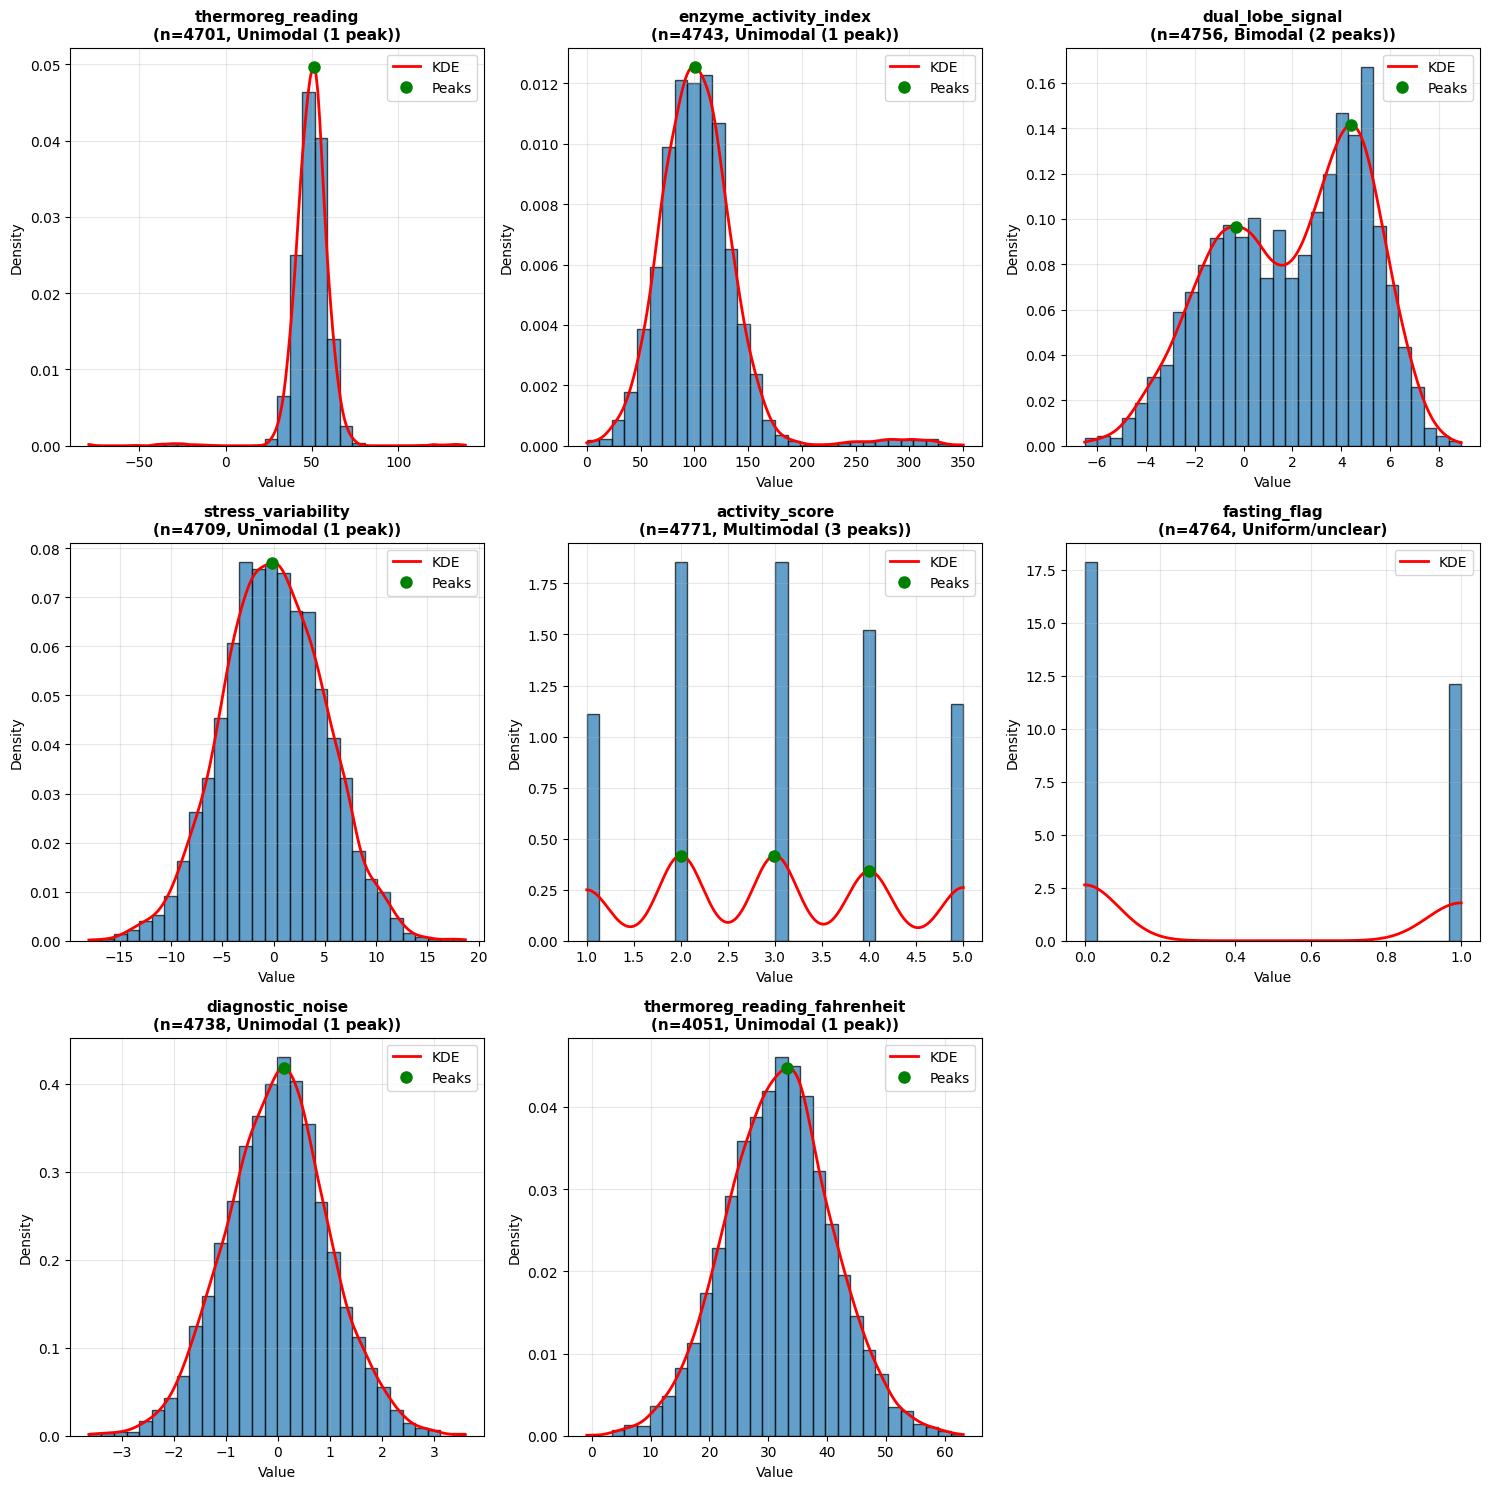

Distribution Analysis Complete


In [49]:
# Create histograms for all numeric columns
import scipy.stats as stats
from scipy.signal import find_peaks

# Set up the plot grid
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row, round up for rows
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten() # Flatten to 1D array for easier indexing

# Dictionary to store analysis results for summary
distribution_summary = {}

# Analyze each numeric column
for idx, col in enumerate(numeric_cols):
    # Analyze distribution (prints statistics)
    clean_data = analyze_distribution(col, df[col])
    
    # Detect modality by finding peaks in KDE
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(clean_data)
    x_range = np.linspace(clean_data.min(), clean_data.max(), 200)
    kde_values = kde(x_range)
    
    # Find peaks in the KDE curve
    peaks, _ = find_peaks(kde_values, prominence=0.01)  # prominence filters out minor peaks
    n_peaks = len(peaks)
    
    if n_peaks == 1:
        modality = "Unimodal (1 peak)"
    elif n_peaks == 2:
        modality = "Bimodal (2 peaks)"
    elif n_peaks > 2:
        modality = f"Multimodal ({n_peaks} peaks)"
    else:
        modality = "Uniform/unclear"
    
    print(f"\nModality: {modality}")
    
    # Store summary info
    distribution_summary[col] = {
        'mean': clean_data.mean(),
        'median': clean_data.median(),
        'skewness': stats.skew(clean_data),
        'modality': modality,
        'outlier_pct': len(clean_data[(clean_data < (clean_data.quantile(0.25) - 1.5 * (clean_data.quantile(0.75) - clean_data.quantile(0.25)))) | 
                                       (clean_data > (clean_data.quantile(0.75) + 1.5 * (clean_data.quantile(0.75) - clean_data.quantile(0.25))))]) / len(clean_data) * 100
    }
    
    # Create histogram with KDE curve
    ax = axes[idx]
    ax.hist(clean_data, bins=30, edgecolor='black', alpha=0.7, density=True) # Histogram bars
    
    # Add KDE (kernel density estimate) curve
    ax.plot(x_range, kde_values, color='red', linewidth=2, label='KDE') # Smooth curve showing distribution shape
    
    # Mark peaks on the plot
    if n_peaks > 0:
        ax.plot(x_range[peaks], kde_values[peaks], 'go', markersize=8, label='Peaks')
    
    ax.set_title(f'{col}\n(n={len(clean_data)}, {modality})', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True, alpha=0.3)
    ax.legend()

# Hide extra subplots if any
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print("Distribution Analysis Complete")

**Distribution Analysis Summary**

The distributions of numerical attributes were examined to assess skewness,
modality, and the presence of outliers. Most features exhibited some degree of
skewness and appeared unimodal based on histogram inspection. Outliers were
identified using the interquartile range (IQR) criterion. All distributions
were visualized using histograms with kernel density estimates to support
interpretation.


**Class Balance Analysis**

The target variable distribution was analyzed to assess class balance. Class proportions were computed and visualized using a bar chart to identify potential imbalance between outcome categories.

Understanding class balance is important, as class imbalance can bias model training toward the majority class and may require mitigation strategies such as resampling or class weighting in downstream modeling.

Target Variable Class Balance

Class Counts:
Class 0: 2501 samples (50.0%)
Class 1: 2499 samples (50.0%)

Total samples: 5000

Balance ratio (min/max): 0.999
Assessment: Well balanced


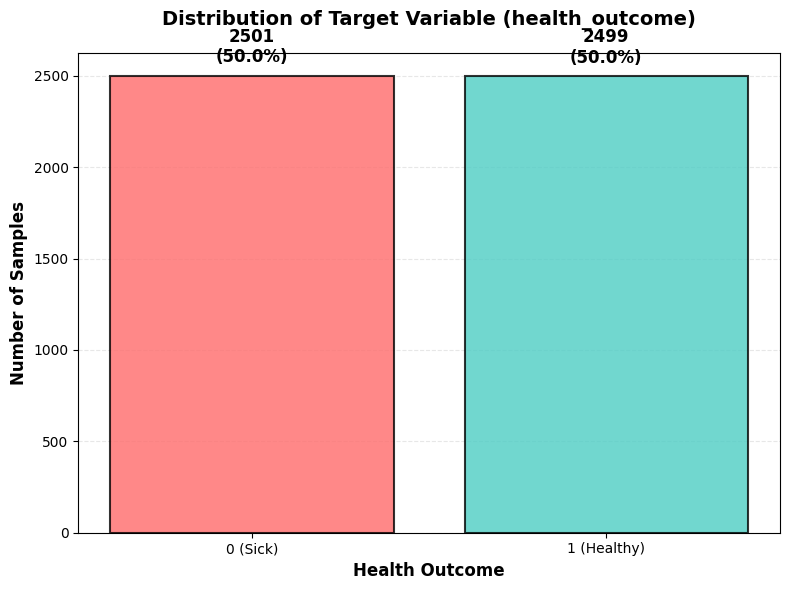

Class Balance Analysis Complete


In [52]:
# Class Balance Analysis

print("Target Variable Class Balance")

# Count values for each class
class_counts = df['health_outcome'].value_counts().sort_index() # Count occurrences of 0 and 1, sort by index
class_props = df['health_outcome'].value_counts(normalize=True).sort_index() # Get proportions instead of counts

print(f"\nClass Counts:")
for class_val, count in class_counts.items():
    print(f"Class {class_val}: {count} samples ({class_props[class_val]*100:.1f}%)")

print(f"\nTotal samples: {len(df)}")

# Determine balance
ratio = class_counts.min() / class_counts.max() # Ratio of minority to majority class
print(f"\nBalance ratio (min/max): {ratio:.3f}")

if ratio >= 0.8:
    balance_status = "Well balanced"
elif ratio >= 0.5:
    balance_status = "Moderately imbalanced"
else:
    balance_status = "Highly imbalanced"

print(f"Assessment: {balance_status}")

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars
bars = ax.bar(class_counts.index, class_counts.values, 
              color=['#FF6B6B', '#4ECDC4'], # Red for 0 (sick), teal for 1 (healthy)
              edgecolor='black', 
              linewidth=1.5,
              alpha=0.8)

# Add value labels on top of bars
for i, (class_val, count) in enumerate(class_counts.items()):
    ax.text(class_val, count + 50, # Position text slightly above bar
            f'{count}\n({class_props[class_val]*100:.1f}%)', # Show count and percentage
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# Formatting
ax.set_xlabel('Health Outcome', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Target Variable (health_outcome)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks([0, 1])
ax.set_xticklabels(['0 (Sick)', '1 (Healthy)'])
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True) # Put grid behind bars

plt.tight_layout()
plt.show()

print("Class Balance Analysis Complete")

**Class Balance Summary**

The target variable (`health_outcome`) contains two classes with nearly equal
representation. Approximately 50% of samples correspond to the sick class
(Class 0), and 50% correspond to the healthy class (Class 1), yielding a
minority-to-majority ratio of approximately 0.999.

The classes are therefore well balanced, and no special handling for class
imbalance is required in downstream modeling.

**Saving the Clean Dataset**

The cleaned dataset was finalized by retaining only informative features along
with the target variable. Data types were verified to ensure consistency, and
all missing values were confirmed to be represented as NaN.

The resulting dataset was saved as `alien_pet_health_cleaned.csv` for use in
subsequent machine learning experiments.


In [54]:
# Verify Data Types and Save Clean Data

print("Preparing to Save Clean Dataset")

# Current state
print(f"\nCurrent dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Verify and correct data types
print("\nVerifying Data Types")

# Define expected types for each column
numeric_features = [
    'thermoreg_reading', 
    'enzyme_activity_index', 
    'dual_lobe_signal', 
    'stress_variability', 
    'activity_score', 
    'diagnostic_noise',
    'thermoreg_reading_fahrenheit'
]

binary_features = ['fasting_flag']  # Binary: 0 or 1

categorical_features = ['habitat_zone', 'calibration_tag']

target = 'health_outcome'  # Binary target

# Ensure numeric columns are float64
for col in numeric_features:
    if col in df.columns:
        df[col] = df[col].astype('float64')  # Convert to float
        print(f"  {col}: float64")

# Ensure binary columns are int64 (0/1)
for col in binary_features:
    if col in df.columns:
        df[col] = df[col].astype('Int64')  # Int64 allows NaN, int64 doesn't
        print(f"  {col}: Int64 (binary)")

# Target should be int64
df[target] = df[target].astype('int64')  # No NaN in target
print(f"  {target}: int64 (target)")

# Categorical remain as string/object
for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].astype('object')  # Keep as string
        print(f"  {col}: object (categorical)")

# Final quality check
print("\nFinal Data Quality Check")

print(f"\nDataset info:")
df.info()

print(f"\nMissing values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("None")

print(f"\nTotal missing: {df.isnull().sum().sum()} ({(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%)")


# Save to CSV
print("\nSaving Dataset")

output_filename = 'alien_pet_health_cleaned.csv'
df.to_csv(output_filename, index=False)  # Save without row index

print(f"\nSaved as: {output_filename}")
print(f"Location: Current working directory")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Verify file
import os
if os.path.exists(output_filename):
    file_size = os.path.getsize(output_filename) / 1024
    print(f"File size: {file_size:.1f} KB")
    print(f"\nFile successfully saved")
else:
    print(f"\nError: File not saved")

# Show sample
print("\nSample of Saved Data:")
display(df.head())

Preparing to Save Clean Dataset

Current dataset shape: (5000, 11)
Columns: ['thermoreg_reading', 'enzyme_activity_index', 'dual_lobe_signal', 'stress_variability', 'habitat_zone', 'activity_score', 'fasting_flag', 'health_outcome', 'calibration_tag', 'diagnostic_noise', 'thermoreg_reading_fahrenheit']

Verifying Data Types
  thermoreg_reading: float64
  enzyme_activity_index: float64
  dual_lobe_signal: float64
  stress_variability: float64
  activity_score: float64
  diagnostic_noise: float64
  thermoreg_reading_fahrenheit: float64
  fasting_flag: Int64 (binary)
  health_outcome: int64 (target)
  habitat_zone: object (categorical)
  calibration_tag: object (categorical)

Final Data Quality Check

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   thermoreg_reading             4701 non-null   fl

,thermoreg_reading,enzyme_activity_index,dual_lobe_signal,stress_variability,habitat_zone,activity_score,fasting_flag,health_outcome,calibration_tag,diagnostic_noise,thermoreg_reading_fahrenheit
0,52.6,97.0,3.6,-3.5,c2,2.0,0,1,a,0.482088,34.742454
1,41.8,105.0,3.4,10.5,c1,2.0,0,0,a,NaN,NaN
2,56.2,126.0,5.5,9.6,c2,5.0,0,0,a,-0.747352,38.754061
3,57.7,106.0,-4.1,-4.0,c1,4.0,0,1,a,0.570478,40.465082
4,34.5,73.0,2.3,0.3,c4,5.0,1,1,a,-0.310844,NaN


**Summary of Clean Dataset**

Dataset saved as: `alien_pet_health_cleaned.csv`

Final Characteristics:
- Rows: 5,000 alien pet health records
- Columns: 11 features + 1 target variable

Column Types:
- Numeric (float64): `thermoreg_reading`, `enzyme_activity_index`, `dual_lobe_signal`, `stress_variability`, `activity_score`, `diagnostic_noise`, `thermoreg_reading_fahrenheit`
- Binary (Int64): `fasting_flag` (0/1, allows NaN)
- Categorical (object): `habitat_zone`, `calibration_tag`
- Target (int64): `health_outcome` (0=sick, 1=healthy)

Data Quality:
- Missing values properly encoded as NaN
- All categorical values normalized (lowercase, trimmed)
- Non-informative columns removed
- Correct data types assigned

The dataset is now ready for machine learning model development.